# Deciding on a model: Regression vs. Classification

### For supervised learning problems

In [1]:
from IPython.display import VimeoVideo
# Tutorial Video Name: Introduction to Machine Learning
VimeoVideo('665813148', width=720, height=480)

https://vimeo.com/665813148

[List of Supervised sklearn Models](https://scikit-learn.org/stable/supervised_learning.html)

[List of Scoring Metrics in sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html)

# What is a classifier?

In statistics, classification is the problem of identifying which of a set of categories an observation, belongs to. Examples are assigning a given email to the "spam" or "non-spam" class, and assigning a diagnosis to a given patient based on observed characteristics of the patient. - Wikipedia

# What is a regressor?

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable and one or more independent variables. - Wikipedia

# ...one more time in English please!

## Classification

The target variable of the model, the dependent variable, is composed of classes, or a set of observations.

## Regression

The target variable of the model, the dependent variable, is numeric and continous in nature. 

# Real Code Examples with sklearn models

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset("mpg")

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
from sklearn.linear_model import LinearRegression # Regressor
from sklearn.linear_model import LogisticRegression # Classifier

from sklearn.model_selection import train_test_split

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [8]:
df['horsepower'] = df.horsepower.fillna(df.horsepower.mean())

In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [10]:
X = df.drop(columns=['name', 'mpg'])
y = df['mpg']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
lin_reg = LinearRegression()

In [14]:
lin_reg.fit(X_train, y_train)

ValueError: could not convert string to float: 'japan'

# Fails because the regression expects all IVs to be numeric

So we will recode origin into dummy codes

In [16]:
origin_dummies = pd.get_dummies(df['origin'], drop_first=True)
origin_dummies

,japan,usa
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
393,0,1
394,0,0
395,0,1
396,0,1


In [17]:
df = pd.concat([df, origin_dummies], axis=1)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0,1
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,0,1


In [18]:
X = df.drop(columns=['name', 'mpg', 'origin'])
y = df['mpg']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
lin_reg = LinearRegression()

In [21]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [22]:
preds = lin_reg.predict(X_test)

In [23]:
preds

array([32.4896536 , 29.22027615, 20.71924286, 16.86489351, 12.55989002,
       26.95118879, 27.52158691,  9.90015993, 17.07839714, 21.63274064,
       12.6365523 , 35.92443241, 24.62106348, 13.66215725, 23.27976074,
        6.35497432, 29.1560811 , 25.28890557, 16.36244466, 36.18636662,
       24.81393605, 18.48331178, 28.53230126, 28.22320822, 14.70228676,
       36.18131621, 26.66097623, 24.35909842, 21.69759049,  8.70198925,
       27.96249063, 36.09637058, 20.57519499, 25.79099287, 34.03482189,
       12.25696611, 22.63747084, 21.83750712, 12.44887978, 27.94073254,
       26.07132474, 28.4555847 , 21.39724254,  7.66518723, 24.21593552,
       34.78855934, 27.71870565, 25.48701917, 23.73667325, 28.70162852,
       21.96382087, 33.37098644, 32.4931023 , 11.01585115, 27.53477987,
        9.87257907, 19.78930219, 29.7163758 , 22.4362693 , 20.06287009,
       16.22259722, 31.68069591, 23.4092677 , 21.7793151 , 20.52603224,
       25.13276325, 24.60750329, 31.8310215 , 27.63640396, 12.58

In [24]:
lin_reg.score(X_train, y_train) # R^2 score

0.8110471993346398

In [25]:
lin_reg.score?

Signature: lin_reg.score(X, y, sample_weight=None)
Docstring:
Return the coefficient of determination of the prediction.

The coefficient of determination :math:`R^2` is defined as
:math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always predicts
the expected value of `y`, disregarding the input features, would get
a :math:`R^2` score of 0.0.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples. For some estimators this may be a precomputed
    kernel matrix or a list of generic objects instead with shape
    ``(n_samples, n_samples_fitted)``, where ``n_samples_fitted``
    is the number of samples used in the fitting for the estimator.

y : array-like of shape (n_samples,) or (n_samples, n_

# Methods of scoring a regression analysis

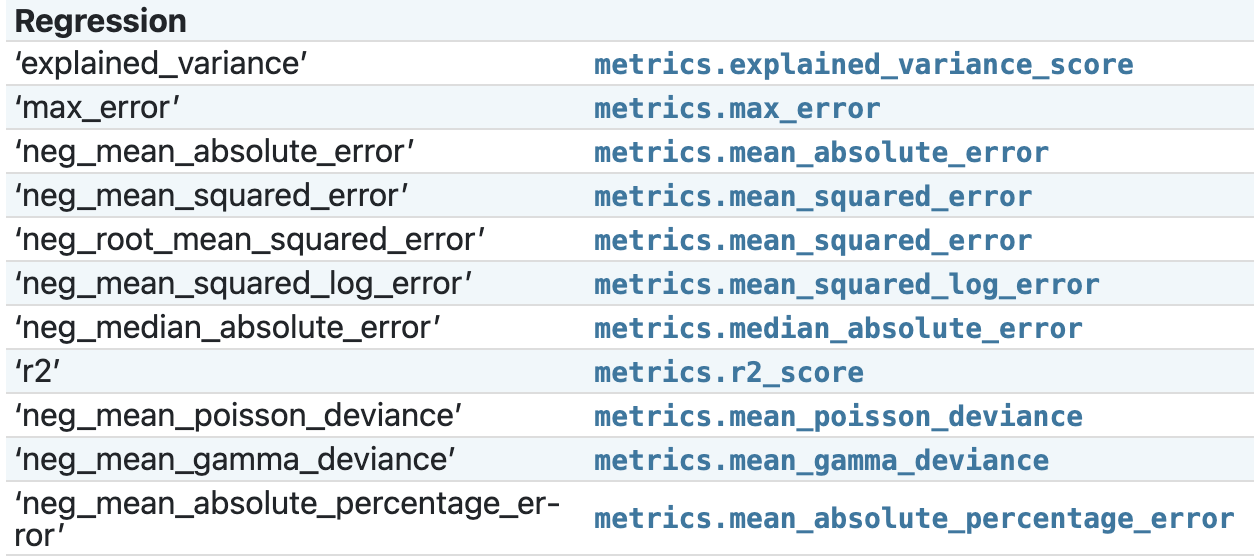


### Easy way to evaluate model performance-Scatterplot of true and predicted values

<AxesSubplot:xlabel='mpg'>

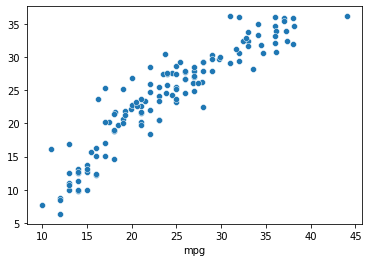

In [26]:
sns.scatterplot(y_test, preds)

# Same X, y but with a classifier

In [27]:
log_reg = LogisticRegression()

In [28]:
log_reg.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

### Unknown label type: 'continouous'

Usually indicates that you are attempting to run a regression using a classifier.

# Classification Example-Same Data, different target

In [29]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0,1


In [30]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [31]:
df.filter?

Signature:
df.filter(
    items=None,
    like: 'str | None' = None,
    regex: 'str | None' = None,
    axis=None,
) -> 'FrameOrSeries'
Docstring:
Subset the dataframe rows or columns according to the specified index labels.

Note that this routine does not filter a dataframe on its
contents. The filter is applied to the labels of the index.

Parameters
----------
items : list-like
    Keep labels from axis which are in items.
like : str
    Keep labels from axis for which "like in label == True".
regex : str (regular expression)
    Keep labels from axis for which re.search(regex, label) == True.
axis : {0 or ‘index’, 1 or ‘columns’, None}, default None
    The axis to filter on, expressed either as an index (int)
    or axis name (str). By default this is the info axis,
    'index' for Series, 'columns' for DataFrame.

Returns
-------
same type as input object

See Also
--------
DataFrame.loc : Access a group of rows and columns
    by label(s) or a boolean array.

Notes
-----
The `

In [32]:
X = df.filter(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model_year'], axis=1)
y = df['origin'] # NOTICE: Target for classification can be strings

In [33]:
y.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
classification_log_reg = LogisticRegression()

In [36]:
classification_log_reg.fit(X_train, y_train)

LogisticRegression()

In [37]:
preds = classification_log_reg.predict(X_test)

In [38]:
classification_log_reg.score(X_test, y_test) # Mean accuracy

0.7651515151515151

In [39]:
classification_log_reg.score?

Signature: classification_log_reg.score(X, y, sample_weight=None)
Docstring:
Return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy
which is a harsh metric since you require for each sample that
each label set be correctly predicted.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    True labels for `X`.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

Returns
-------
score : float
    Mean accuracy of ``self.predict(X)`` wrt. `y`.
File:      /usr/local/lib/python3.9/site-packages/sklearn/base.py
Type:      method


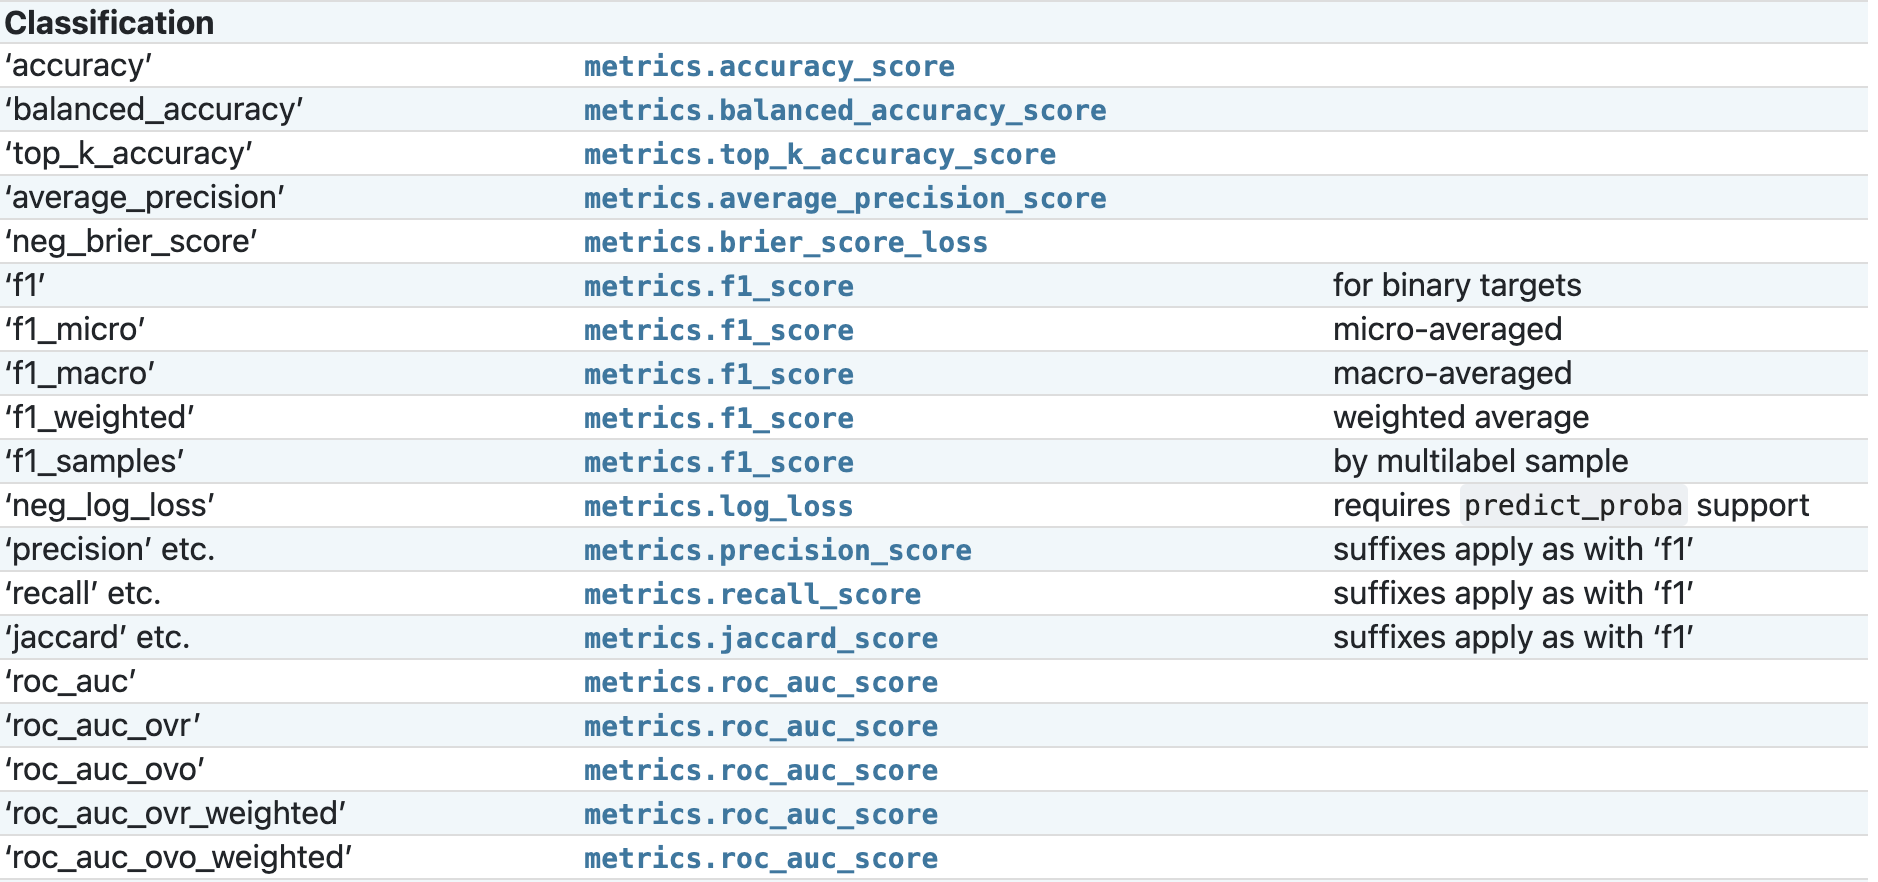

### Classification report

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      europe       0.53      0.39      0.45        23
       japan       0.68      0.66      0.67        29
         usa       0.84      0.91      0.87        80

    accuracy                           0.77       132
   macro avg       0.68      0.65      0.66       132
weighted avg       0.75      0.77      0.75       132



### Confusion Matrix-Best way to visualize results

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

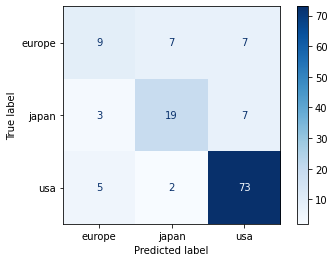

In [42]:
ConfusionMatrixDisplay.from_estimator(classification_log_reg, X_test, y_test, cmap='Blues')

## Attempt same analyis with a regressor

In [43]:
classification_lin_reg = LinearRegression()

In [44]:
classification_lin_reg.fit(X_train, y_train)

ValueError: could not convert string to float: 'japan'

### Could not convert string to float: 'japan'

The regressor model can NOT handle strings as a target

# Regression and Classification Pairs for sklearn

Below is a partial list of models which have both a classification and regression option available in sklearn.

BE SURE TO CHOOSE THE RIGHT ONE FOR YOUR ANALYSIS!!!

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Review

- Classification is used when target is a category
    - Can handle strings as a target
    - Predictors must be numeric
    - Use confusion matrix to visualize results
    - Use classification report to gather metrics
- Regression is used when target is numeric/continuous in nature
    - Target must be numeric
    - Predictors must be numeric
    - Use scatterplot to visualize results
    - Use R^2, MSE and other metrics for regression